# Comparison

Learn how to easily compare plots from different models.

- Compare two models by plotting all values: `plot1 + plot2`
- Compare the performance between two models: `plot2 - plot1`

## Confusion matrix

*Added in sklearn-evaluation version 0.7.2*

In [1]:
import matplotlib
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn_evaluation import plot

In [2]:
matplotlib.rcParams["figure.figsize"] = (7, 7)
matplotlib.rcParams["font.size"] = 18

In [3]:
# get training and testing data
X, y = datasets.make_classification(
    1000, 20, n_informative=10, class_sep=0.80, n_classes=3, random_state=0
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# fit decision tree and random forest, return confusion matrices
tree_pred, forest_pred = [
    est.fit(X_train, y_train).predict(X_test)
    for est in [DecisionTreeClassifier(), RandomForestClassifier()]
]

### Decision tree confusion matrix

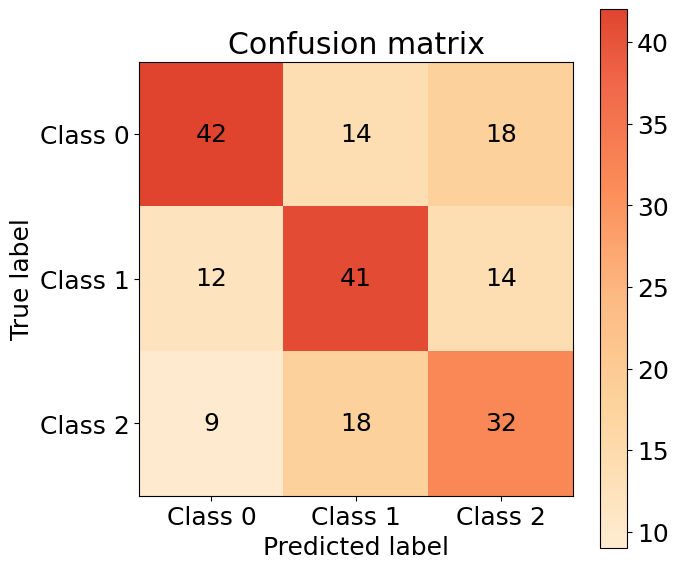

In [4]:
tree_cm = plot.ConfusionMatrix.from_raw_data(y_test, tree_pred, normalize=False)

### Random forest confusion matrix

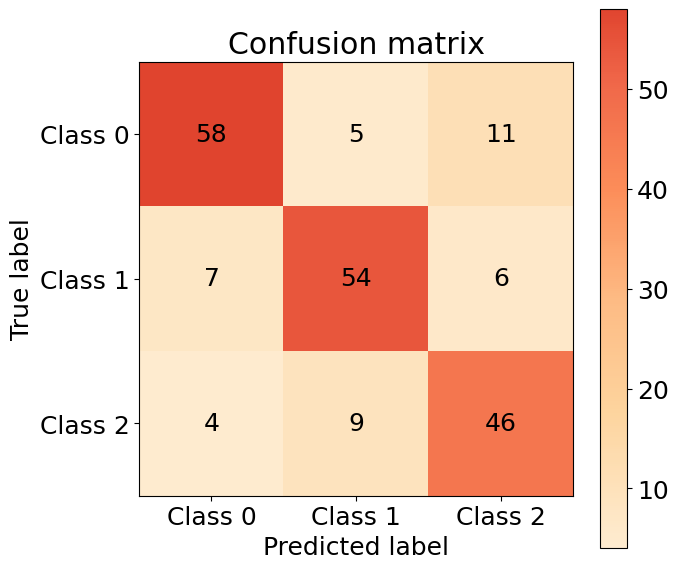

In [5]:
forest_cm = plot.ConfusionMatrix.from_raw_data(y_test, forest_pred, normalize=False)

### Compare confusion matrices

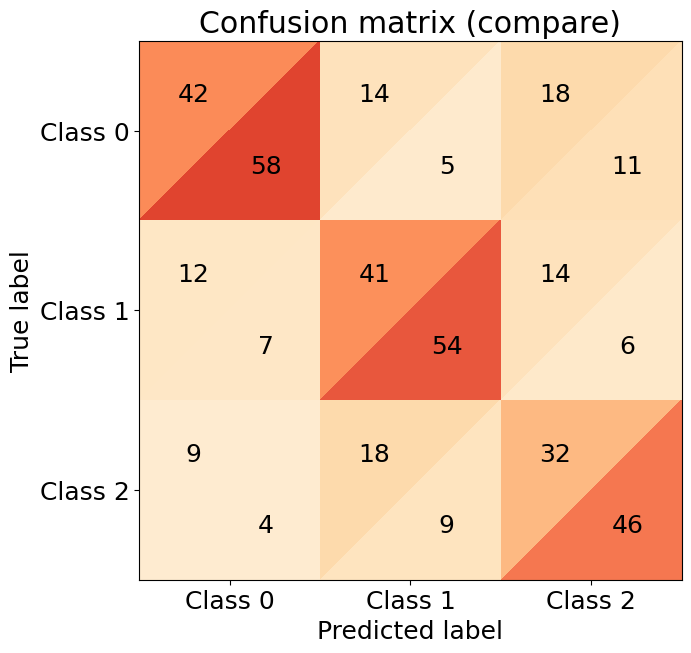

In [6]:
compare = tree_cm + forest_cm

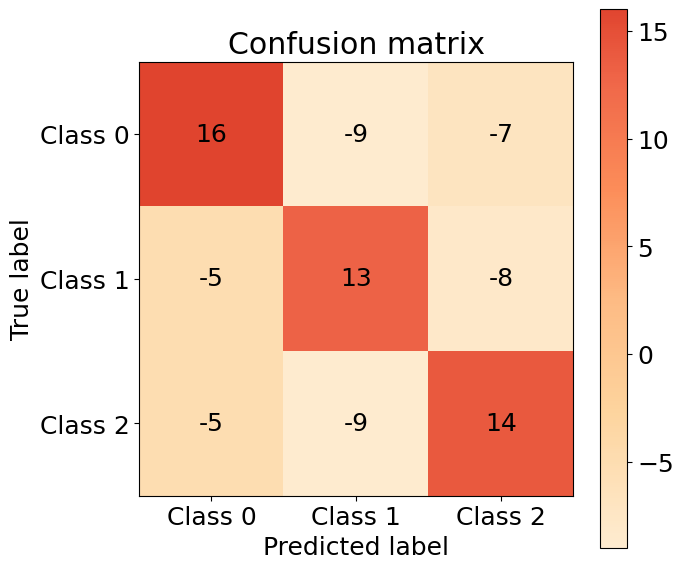

In [7]:
diff = forest_cm - tree_cm

## ROC

In [8]:
logistic_score, forest_score = [
    est.fit(X_train, y_train).predict_proba(X_test)
    for est in [LogisticRegression(), RandomForestClassifier()]
]

### Logistic regression ROC

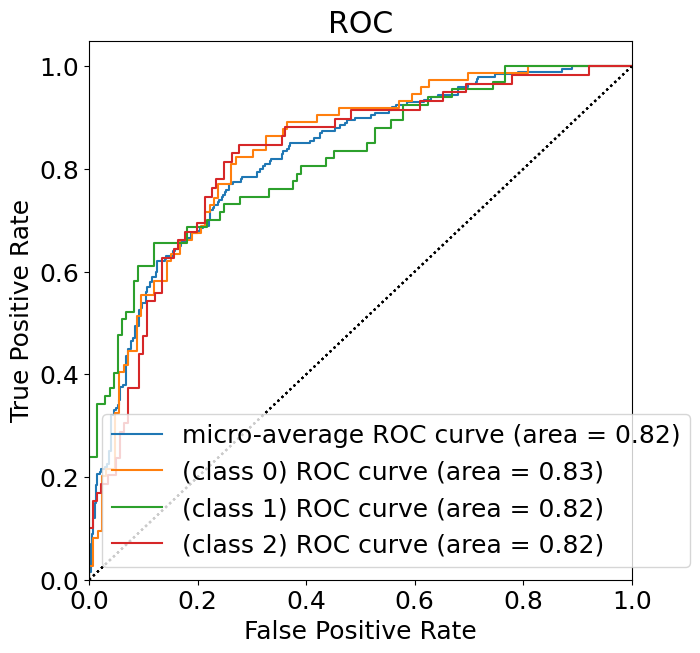

In [9]:
logistic_roc = plot.ROC.from_raw_data(y_test, logistic_score)

### Random forest ROC

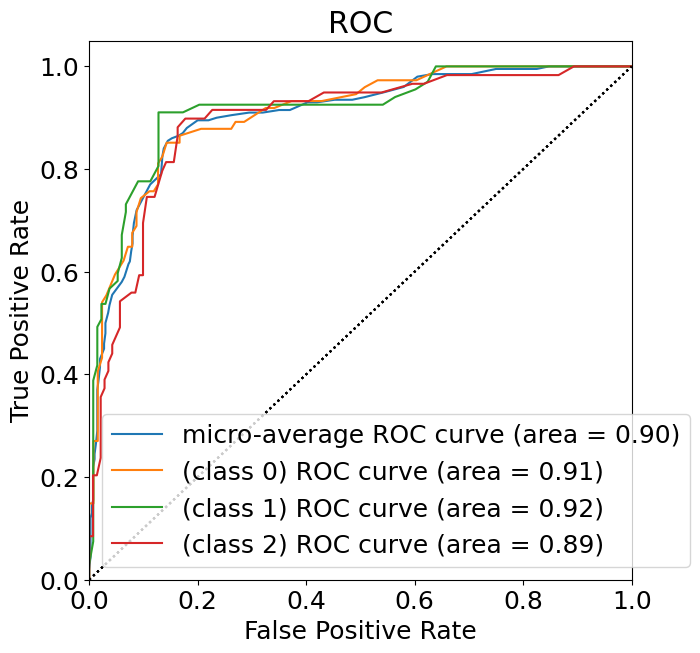

In [10]:
forest_roc = plot.ROC.from_raw_data(y_test, forest_score)

### Compare ROC

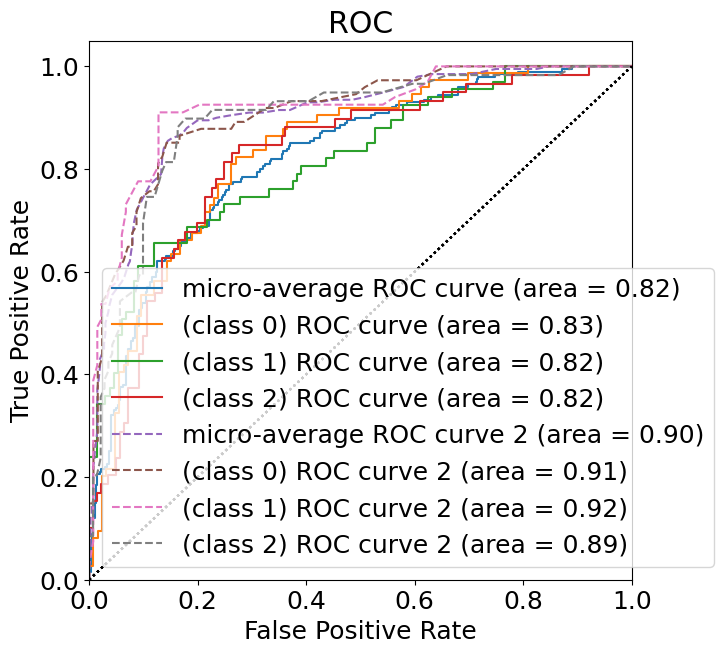

In [11]:
compare = logistic_roc + forest_roc

## Classification report

*Added in sklearn-evaluation version 0.7.8*


### Decision tree classification report

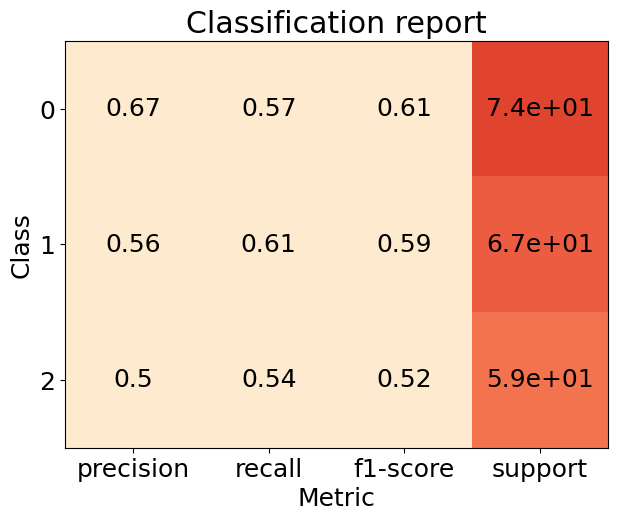

In [12]:
tree_cr = plot.ClassificationReport.from_raw_data(y_test, tree_pred)

### Random forest classification report

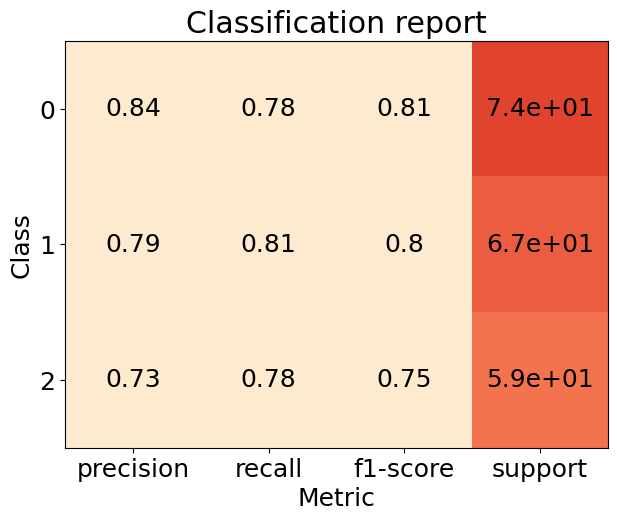

In [13]:
forest_cr = plot.ClassificationReport.from_raw_data(y_test, forest_pred)

### Compare classification reports

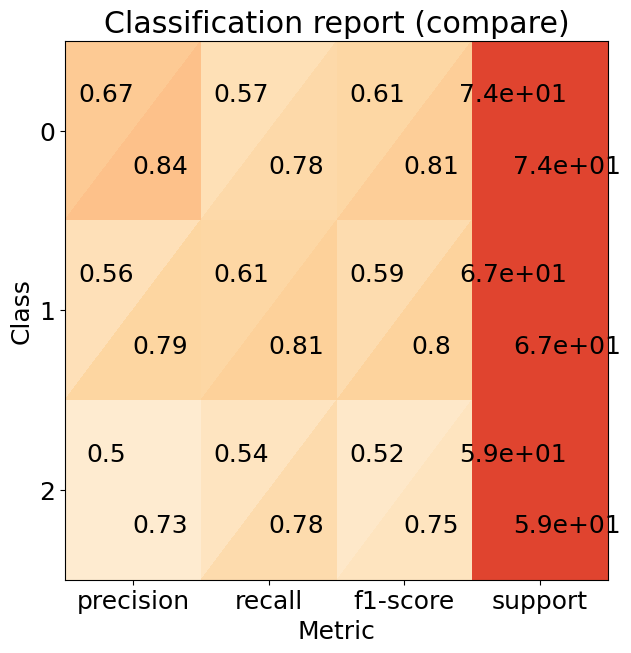

In [14]:
compare = tree_cr + forest_cr

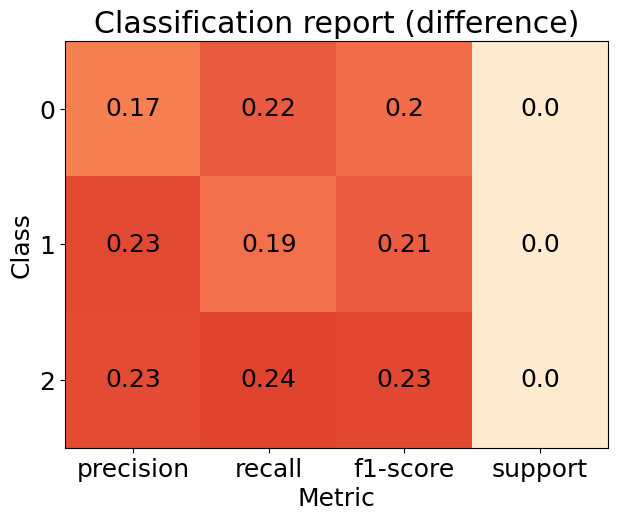

In [15]:
diff = forest_cr - tree_cr

## Precision Recall Curve

In [16]:
tree_score, forest_score = [
    est.fit(X_train, y_train).predict_proba(X_test)
    for est in [DecisionTreeClassifier(), RandomForestClassifier()]
]

### Decision tree PR

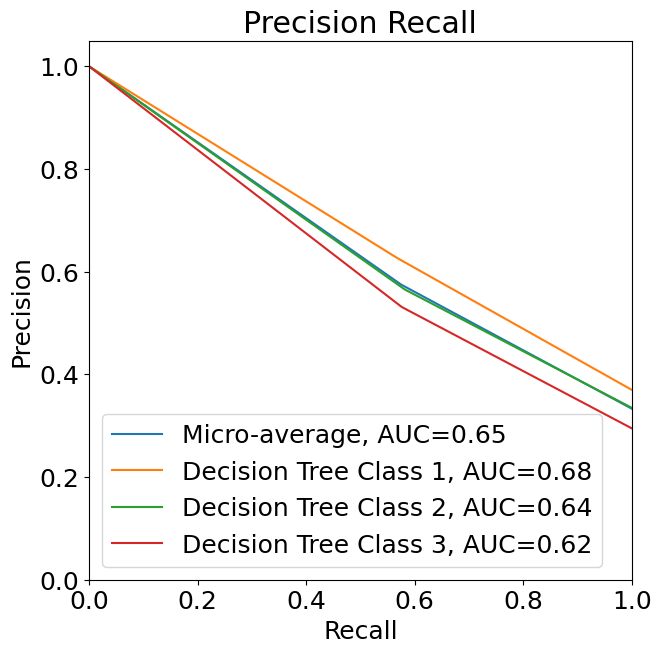

In [17]:
tree_pr = plot.PrecisionRecall.from_raw_data(
    y_test,
    tree_score,
    label=["Decision Tree Class 1", "Decision Tree Class 2", "Decision Tree Class 3"],
)

### Random forest PR

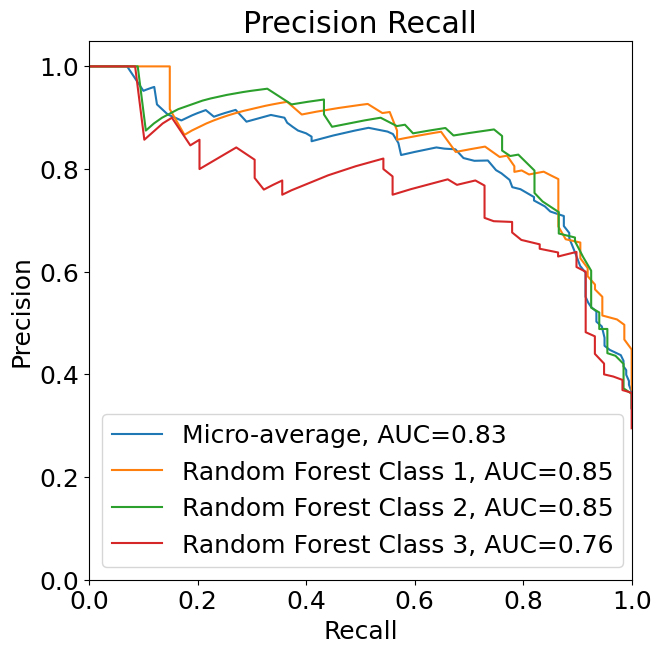

In [18]:
forest_pr = plot.PrecisionRecall.from_raw_data(
    y_test,
    forest_score,
    label=["Random Forest Class 1", "Random Forest Class 2", "Random Forest Class 3"],
)

### Compare PR

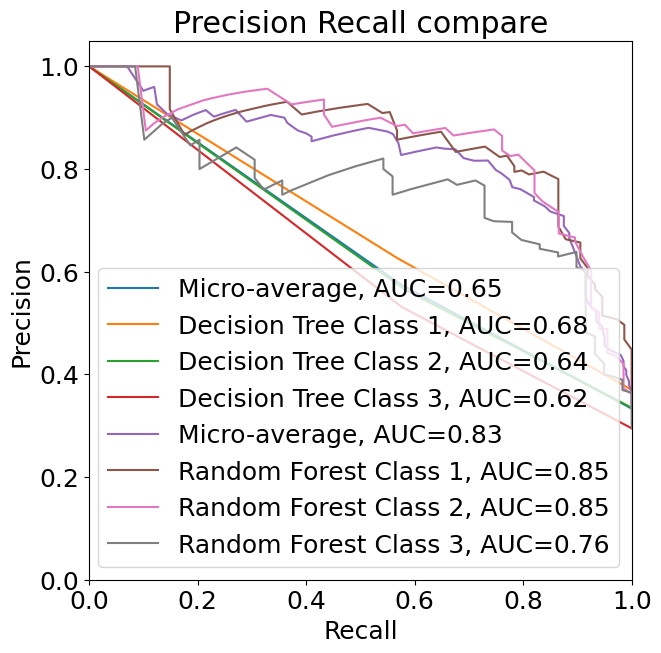

In [19]:
compare = tree_pr + forest_pr